In [1]:
# regular imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

# Wrangling
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.cluster import KMeans
from scipy import stats
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr, kruskal

import csv
import cc_acquire
import cc_prepare

In [ ]:
# df = acquire.get_bach_df()
# df = prepare.clean_college_df(df)

# cleaned_df = prepare.clean_step1(df)
# new_df = prepare.avg_net_price(cleaned_df)
# new_df['major_category'] = new_df.major_name.apply(prepare.categorize_major)

# # Ensure you have `2017_2018_2019_earning_by_major.csv` within working folder

# new_df = prepare.earnings_merge(new_df)
# new_df = prepare.create_roi_cols(new_df)

In [2]:
df = pd.read_csv('df_exploration_ready_with_ROI.csv',index_col=[0])
# df = df.iloc[: , 1:]
df.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,2017,2018,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr
0,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.41,40.62,1.99,199.00,5.67,566.93
1,"100,654.00",Alabama A & M University,Public,AL,35762,Normal,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.41,40.62,1.99,199.00,5.67,566.93
2,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.20,19.89,1.55,154.92,4.69,468.62
3,"100,858.00",Auburn University,Public,AL,36849,Auburn,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.20,19.89,1.55,154.92,4.69,468.62
4,"101,541.00",Judson College,"Private, nonprofit",AL,36756,Marion,5.00,1.00,3.00,3.00,...,"57,605.69","55,517.87","61,388.93","174,512.49",0.35,35.12,1.87,187.32,5.41,540.88


In [4]:
df.shape

(68546, 149)

In [7]:
# cols = ['avg_net_price_program','avg_net_price_other']
# df1 = df.drop(columns = cols)
# df1.shape

(71422, 125)

In [8]:
# df1 = df1.dropna(subset=['city'])
# df1.shape

(68546, 125)

In [9]:
def clean_step1(df):
    cols = ['avg_net_price_program','avg_net_price_other']
    df = df.drop(columns = cols)
    df = df.dropna(subset=['city'])
    return df

In [11]:
# df = clean_step1(df)
# df.shape

(68546, 125)

In [61]:
# missing value status after clean step 1
cc_prepare.nulls_by_col(df).to_csv('missing_value_after_step1.csv')

## start explore!

* Summary Statistics across majors
* Breakdown of demographics by major (location, gender, socioeconomic background, institution control, part-time vs. full-time enrollment, etc.)

* Geographic Specific Questions:
        Are there differences across where a university/college is located and the ROI earnings?
        Continental US
        State
        Cities 
        Postal Code

In [5]:
location = pd.read_csv('location_info_by_state.csv')
location.head()

,state,latitude,longitude
0,AK,63.59,-154.49
1,AL,32.32,-86.90
2,AR,35.20,-91.83
3,AZ,34.05,-111.09
4,CA,36.78,-119.42


In [6]:
df.shape

(68546, 149)

In [7]:
# add lat and lng for states
location = location.rename(columns={"state": "state_post_code"})
df = pd.merge(df, location, how = 'left', on = 'state_post_code')
df.shape

(68546, 151)

In [5]:
df.columns.tolist()

['unit_id_institution',
 'college_name',
 'institution_control',
 'state_post_code',
 'zip_code',
 'city',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_name',
 'degree_code',
 'major_code',
 'major_name',
 'branch_number',
 'avg_net_price_public',
 'avg_net_price_private',
 'title_IV_student_number',
 'pub_fam_income_0_30000',
 'private_fam_income_0_30000',
 'program_fam_income_0_30000',
 'other_fam_income_0_30000',
 'pub_fam_income_30001_48000',
 'private_fam_income_30001_48000',
 'program_fam_income_30001_48000',
 'other_fam_income_30001_48000',
 'pub_fam_income_48001_75000',
 'private_fam_income_48001_75000',
 'program_fam_income_48001_75000',
 'other_fam_income_48001_75000',
 'pub_fam_income_75001_110000',
 'private_fam_income_75001_110000',
 'program_fam_income_75001_110000',
 'other_fam_income_75001_110000',
 'pub_fam_income_over_110000',
 'private_fam_income_over_110000',
 'program_fam_income_over_110000',
 'other_fam_income_over_11000

In [6]:
df.shape

(68546, 151)

In [7]:
col = ['avg_net_price_public', 'avg_net_price_private']
df = df.drop(columns = col)
df.shape

(68546, 149)

In [9]:
def split_data(df): 
    train_and_validate, test = train_test_split(
                                                df, 
                                                test_size = 0.2, 
                                                random_state = 123,
                                                stratify = df["major_category"])

    train, validate = train_test_split(
                                    train_and_validate,
                                    test_size = 0.3,
                                    random_state = 123,
                                    stratify = train_and_validate["major_category"])
    return train, validate, test

In [66]:
train, validate, test = split_data(df)
train.shape, validate.shape, test.shape

((38385, 151), (16451, 151), (13710, 151))

In [16]:
# cc_prepare.nulls_by_col(train).head()

In [11]:
# kill the outlier!
from scipy.stats.mstats import winsorize

def percentile_capping(df, low_end, high_end):

    '''Function that uses scipy's winsorize method to cap
    continuous variables at lower and higher end based on a passed 
    percentile values.'''

    l1 = df.select_dtypes(include = "number").columns.tolist()

    # dont include target variables to cap
    target_lst = [ 
                "roi_5yr",
                "roi_10yr",
                "2017",                                               
                "2018",                                                   
                "2019",
                "Grand Total",
                "avg_net_price"]

    col_lst = [col for col in l1 if col not in target_lst]

    for col in col_lst:

        stats.mstats.winsorize(
            a = df[col], 
            limits = (low_end, high_end), 
            inplace = True)

In [67]:
percentile_capping(train, 0.1, 0.1)
train.head()

,unit_id_institution,college_name,institution_control,state_post_code,zip_code,city,region_ipeds,title_IV_eligibility,pred_degree,pred_degree_0and4,...,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,latitude,longitude
25656,"168,847.00",Baker College,"Private, nonprofit",MI,48867,Owosso,3.00,1.00,3.00,3.00,...,"55,781.48","166,079.75",0.37,36.68,1.87,186.52,5.35,534.60,44.31,-85.60
28625,"216,852.00",Widener University,"Private, nonprofit",PA,19013-5792,Chester,2.00,1.00,3.00,3.00,...,"79,448.61","224,509.21",0.38,37.91,1.94,193.77,5.56,555.86,41.20,-77.19
36032,"199,272.00",William Peace University,"Private, nonprofit",NC,27604-1194,Raleigh,5.00,1.00,3.00,3.00,...,"58,901.82","169,042.77",0.15,15.08,1.44,143.99,4.43,443.45,35.76,-79.02
30254,"215,655.00",Robert Morris University,"Private, nonprofit",PA,15108-1189,Moon Township,2.00,1.00,3.00,3.00,...,"49,787.21","143,533.58",-0.05,-5.40,1.00,100.32,3.46,345.63,41.20,-77.19
68185,"147,767.00",Northwestern University,"Private, nonprofit",IL,60208,Evanston,3.00,1.00,3.00,3.00,...,"60,997.54","171,153.36",0.16,16.11,1.48,147.89,4.54,454.00,40.63,-89.40


In [13]:
train.shape

(38385, 151)

### get the basic info columns

In [18]:
train.columns.tolist()

['unit_id_institution',
 'college_name',
 'institution_control',
 'state_post_code',
 'zip_code',
 'city',
 'region_ipeds',
 'title_IV_eligibility',
 'pred_degree',
 'pred_degree_0and4',
 'degree_name',
 'degree_code',
 'major_code',
 'major_name',
 'branch_number',
 'title_IV_student_number',
 'pub_fam_income_0_30000',
 'private_fam_income_0_30000',
 'program_fam_income_0_30000',
 'other_fam_income_0_30000',
 'full_time_net_tuition_revenue',
 'off_campus_cost_of_attendace',
 'on_campus_cost_of_attendace',
 'admission_rate',
 'graduate_number',
 'ACT_score_mid',
 'avg_sat_admitted',
 'required_score',
 'avg_faculty_salary',
 'online_only',
 'comp_rt_ft_150over_expected_time',
 'comp_rt_ft_150over_expected_time_two_races',
 'comp_rt_ft_150over_expected_time_native_american',
 'comp_rt_ft_150over_expected_time_asian',
 'comp_rt_ft_150over_expected_time_black',
 'comp_rt_ft_150over_expected_time_hispanic',
 'comp_rt_ft_150over_expected_time_non_resident',
 'comp_rt_ft_150over_expected_tim

In [72]:
basic_info_cols = ['college_name','institution_control',
                   'state_post_code','city','title_IV_eligibility',
                   'major_name','title_IV_student_number','admission_rate', 
                   'online_only','enrollment_share_two_races','enrollment_share_native_american',
                   'enrollment_share_asian','enrollment_share_black',
                   'enrollment_share_hispanic','enrollment_share_pac_islander',
                   'enrollment_share_non_resident','enrollment_share_unknown',
                   'enrollment_share_white','major_category','2017','2018','2019','Grand Total',
                   'roi_5yr','pct_roi_5yr','roi_10yr','pct_roi_10yr','roi_20yr','pct_roi_20yr',
                   'latitude','longitude']
train1 = train[basic_info_cols]
train1.head()

,college_name,institution_control,state_post_code,city,title_IV_eligibility,major_name,title_IV_student_number,admission_rate,online_only,enrollment_share_two_races,...,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,latitude,longitude
25656,Baker College,"Private, nonprofit",MI,Owosso,1.00,"Liberal Arts and Sciences, General Studies and...",439.00,0.80,0.00,0.04,...,"55,781.48","166,079.75",0.37,36.68,1.87,186.52,5.35,534.60,44.31,-85.60
28625,Widener University,"Private, nonprofit",PA,Chester,1.00,Physics.,649.00,0.69,0.00,0.04,...,"79,448.61","224,509.21",0.38,37.91,1.94,193.77,5.56,555.86,41.20,-77.19
36032,William Peace University,"Private, nonprofit",NC,Raleigh,1.00,Criminal Justice and Corrections.,181.00,0.57,0.00,0.04,...,"58,901.82","169,042.77",0.15,15.08,1.44,143.99,4.43,443.45,35.76,-79.02
30254,Robert Morris University,"Private, nonprofit",PA,Moon Township,1.00,Health and Physical Education/Fitness.,721.00,0.84,0.00,0.03,...,"49,787.21","143,533.58",-0.05,-5.40,1.00,100.32,3.46,345.63,41.20,-77.19
68185,Northwestern University,"Private, nonprofit",IL,Evanston,1.00,Urban Studies/Affairs.,775.00,0.40,0.00,0.06,...,"60,997.54","171,153.36",0.16,16.11,1.48,147.89,4.54,454.00,40.63,-89.40


In [16]:
cc_prepare.nulls_by_col(train1).head()

,num_rows_missing,percent_rows_missing
title_IV_student_number,16998,44.28
admission_rate,4018,10.47
college_name,0,0.00
enrollment_share_white,0,0.00
latitude,0,0.00


## Major
### 1. How is the majors summary in US?

<AxesSubplot:xlabel='count', ylabel='major_category'>

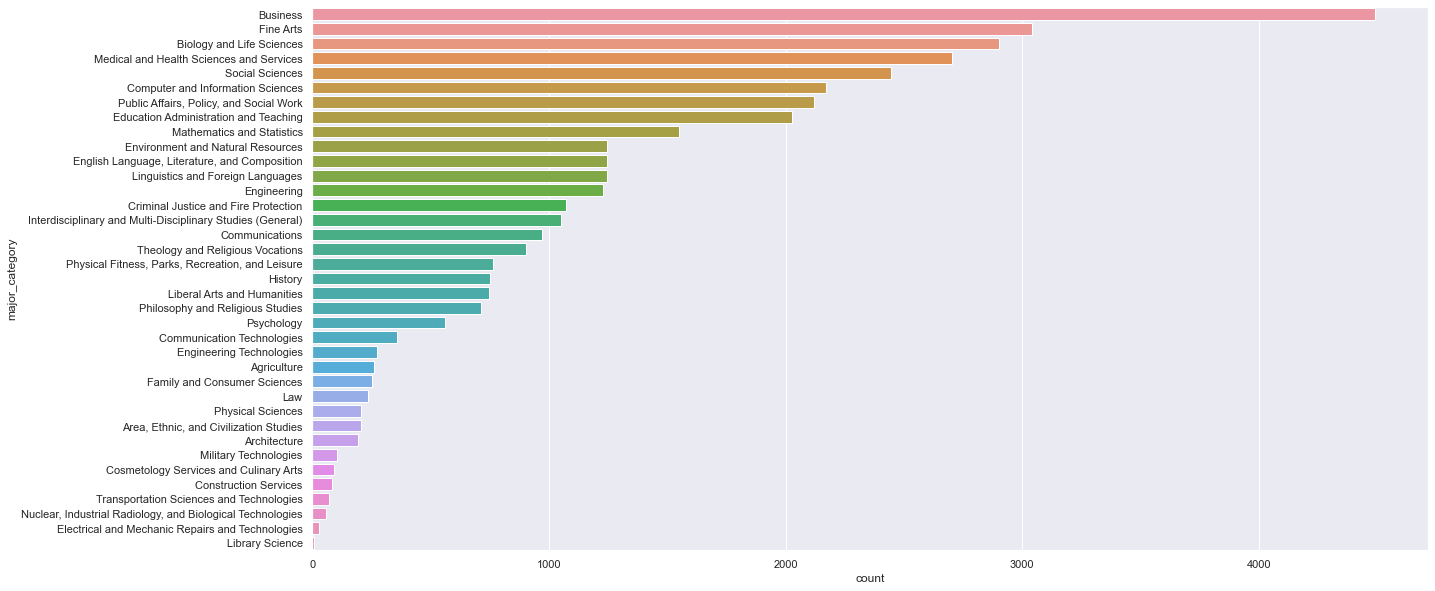

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train, order = train1['major_category'].value_counts().index)

In [18]:
train1.major_category.value_counts().head(10)

Business                                    4491
Fine Arts                                   3041
Biology and Life Sciences                   2902
Medical and Health Sciences and Services    2702
Social Sciences                             2446
Computer and Information Sciences           2170
Public Affairs, Policy, and Social Work     2120
Education Administration and Teaching       2026
Mathematics and Statistics                  1551
Environment and Natural Resources           1247
Name: major_category, dtype: int64

* Top five majors:
    1. Business
    2. Fine Arts                     
    3. Biology and Life Sciences                
    4. Medical and Health Sciences and Services   
    5. Social Sciences      
    6. Computer and Information Sciences      
    7. Public Affairs, Policy, and Social Work  
    8. Education Administration and Teaching   
    9. Mathematics and Statistics     
    10. Environment and Natural Resources    

### college type summary

In [19]:
train1.institution_control.value_counts()

Private, nonprofit     20718
Public                 16359
Private, for-profit     1308
Name: institution_control, dtype: int64

In [20]:
a =20817
b =16359
c =1308
d = a+b+c

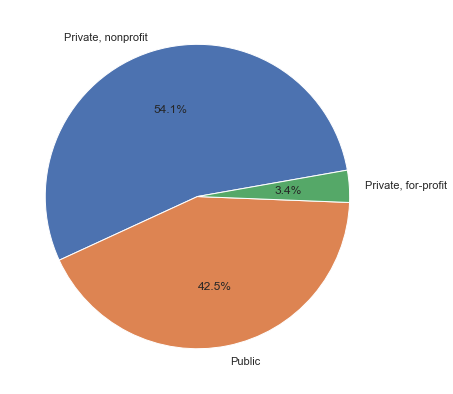

In [21]:
plt.figure(figsize=(7,7))
y = np.array([a/d, b/d, c/d])
mylabels = ["Private, nonprofit", "Public", "Private, for-profit"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%', startangle = 10)
plt.show() 

### 2. Major summary in different school type

<AxesSubplot:xlabel='count', ylabel='major_category'>

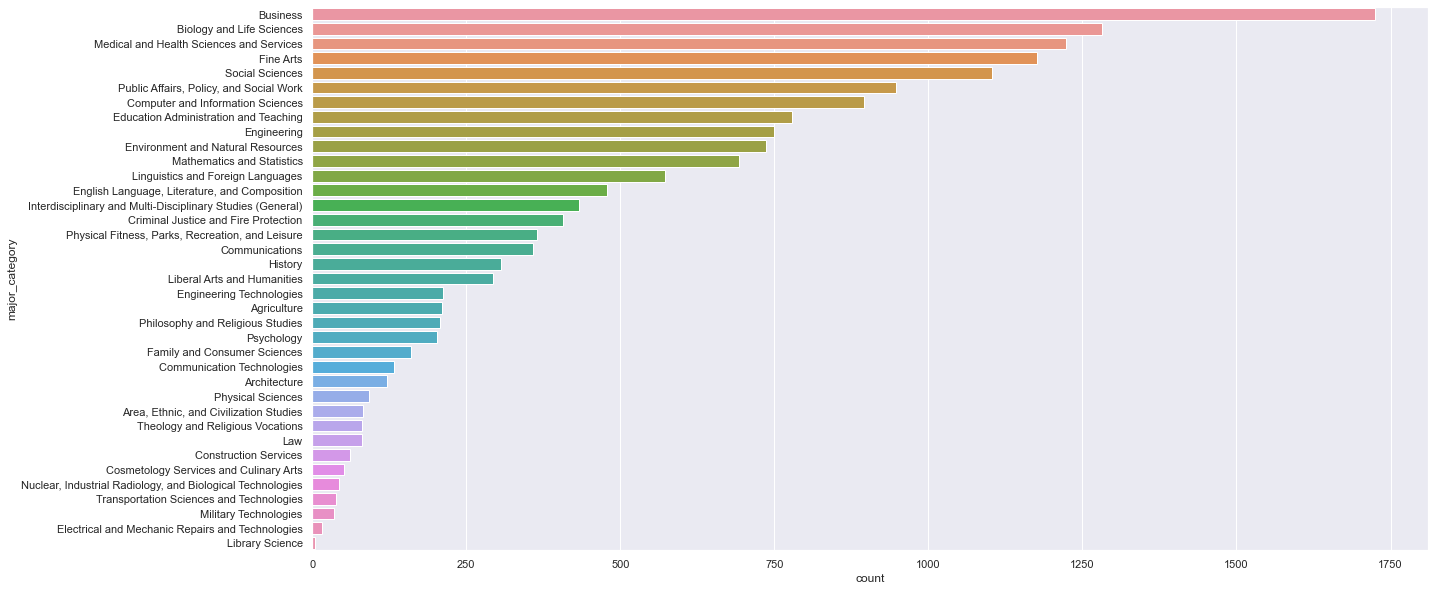

In [22]:
# public
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train1[train1.institution_control == 'Public'],
              order = train1[train1.institution_control == 'Public']['major_category'].value_counts().index)

In [23]:
# top 5
train1[train1.institution_control == 'Public'].major_category.value_counts().head()

Business                                    1725
Biology and Life Sciences                   1281
Medical and Health Sciences and Services    1223
Fine Arts                                   1177
Social Sciences                             1104
Name: major_category, dtype: int64

In [24]:
# least 5
train1[train1.institution_control == 'Public'].major_category.value_counts().tail()

Nuclear, Industrial Radiology, and Biological Technologies    43
Transportation Sciences and Technologies                      38
Military Technologies                                         35
Electrical and Mechanic Repairs and Technologies              16
Library Science                                                5
Name: major_category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='major_category'>

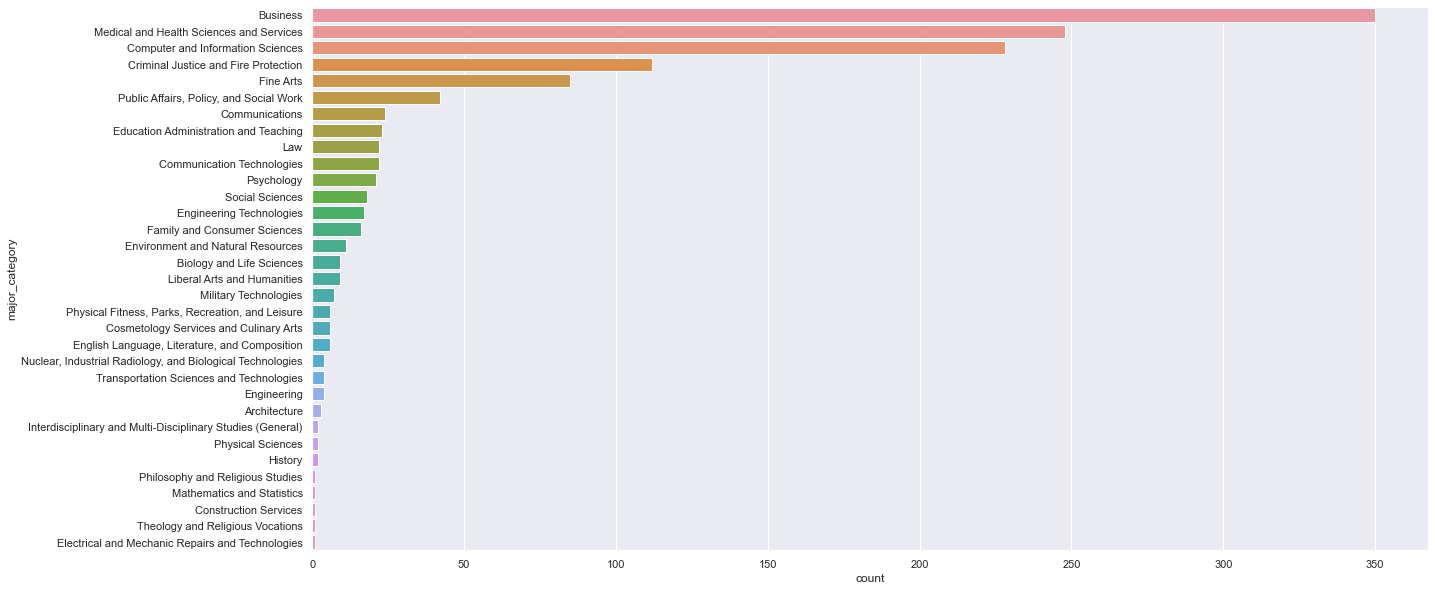

In [25]:
# Private, for-profit
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train[train1.institution_control == 'Private, for-profit'],
              order = train1[train1.institution_control == 'Private, for-profit']['major_category'].value_counts().index)

In [26]:
# top 5
train1[train1.institution_control == 'Private, for-profit'].major_category.value_counts().head()

Business                                    350
Medical and Health Sciences and Services    248
Computer and Information Sciences           228
Criminal Justice and Fire Protection        112
Fine Arts                                    85
Name: major_category, dtype: int64

In [27]:
# least 5
train1[train1.institution_control == 'Private, for-profit'].major_category.value_counts().tail()

Philosophy and Religious Studies                    1
Mathematics and Statistics                          1
Construction Services                               1
Theology and Religious Vocations                    1
Electrical and Mechanic Repairs and Technologies    1
Name: major_category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='major_category'>

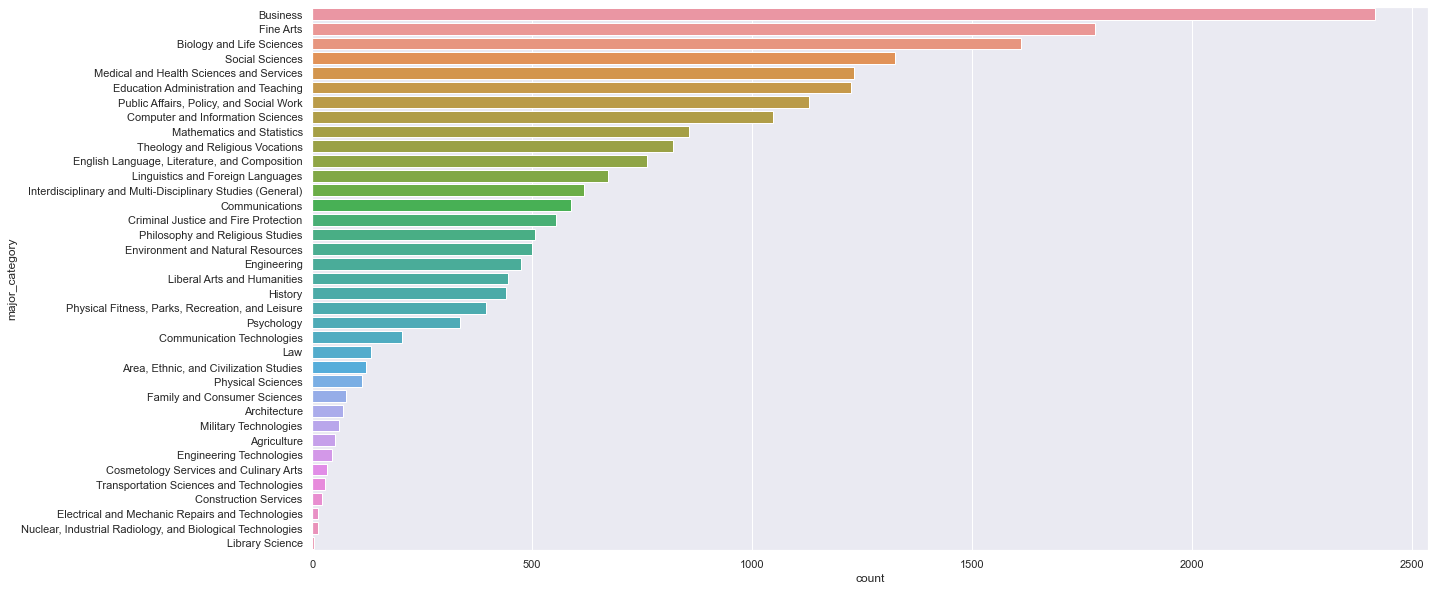

In [28]:
# Private, nonprofit
plt.figure(figsize=(20,10))
sns.countplot(y='major_category', data=train1[train1.institution_control == 'Private, nonprofit'],
              order = train1[train1.institution_control == 'Private, nonprofit']['major_category'].value_counts().index)

In [29]:
# top 5
train1[train1.institution_control == 'Private, nonprofit'].major_category.value_counts().head()

Business                                    2416
Fine Arts                                   1779
Biology and Life Sciences                   1612
Social Sciences                             1324
Medical and Health Sciences and Services    1231
Name: major_category, dtype: int64

In [30]:
# least 5
train1[train1.institution_control == 'Private, nonprofit'].major_category.value_counts().tail()

Transportation Sciences and Technologies                      29
Construction Services                                         23
Electrical and Mechanic Repairs and Technologies              12
Nuclear, Industrial Radiology, and Biological Technologies    12
Library Science                                                3
Name: major_category, dtype: int64

### 3. 5-year, 10-year and 20-year ROI across majors.

In [47]:
train1.head(1)

,college_name,institution_control,state_post_code,city,title_IV_eligibility,major_name,title_IV_student_number,admission_rate,online_only,enrollment_share_two_races,...,2019,Grand Total,roi_5yr,pct_roi_5yr,roi_10yr,pct_roi_10yr,roi_20yr,pct_roi_20yr,latitude,longitude
25656,Baker College,"Private, nonprofit",MI,Owosso,1.00,"Liberal Arts and Sciences, General Studies and...",439.00,0.80,0.00,0.04,...,"55,781.48","166,079.75",0.37,36.68,1.87,186.52,5.35,534.60,44.31,-85.60


<AxesSubplot:xlabel='roi_5yr', ylabel='major_category'>

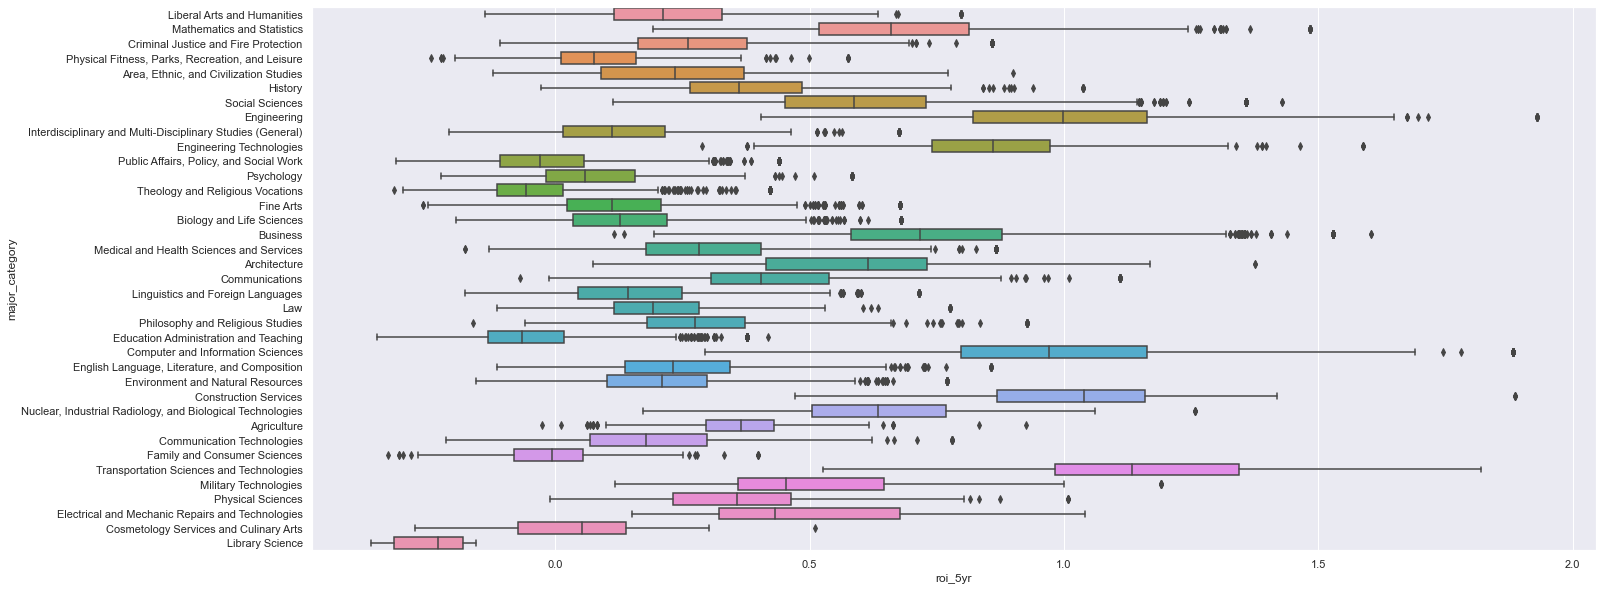

In [48]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='roi_5yr', data = train1)

In [49]:
# top ten 5-year ROI avg majors
train1.groupby('major_category').roi_5yr.mean().nlargest(10)

major_category
Transportation Sciences and Technologies                                     1.15
Construction Services                                                        1.04
Computer and Information Sciences                                            1.01
Engineering                                                                  1.00
Engineering Technologies                                                     0.86
Business                                                                     0.75
Mathematics and Statistics                                                   0.67
Nuclear, Industrial Radiology, and Biological Technologies                   0.65
Social Sciences                                                              0.60
Architecture                                                                 0.58
Name: roi_5yr, dtype: float64

<AxesSubplot:xlabel='roi_10yr', ylabel='major_category'>

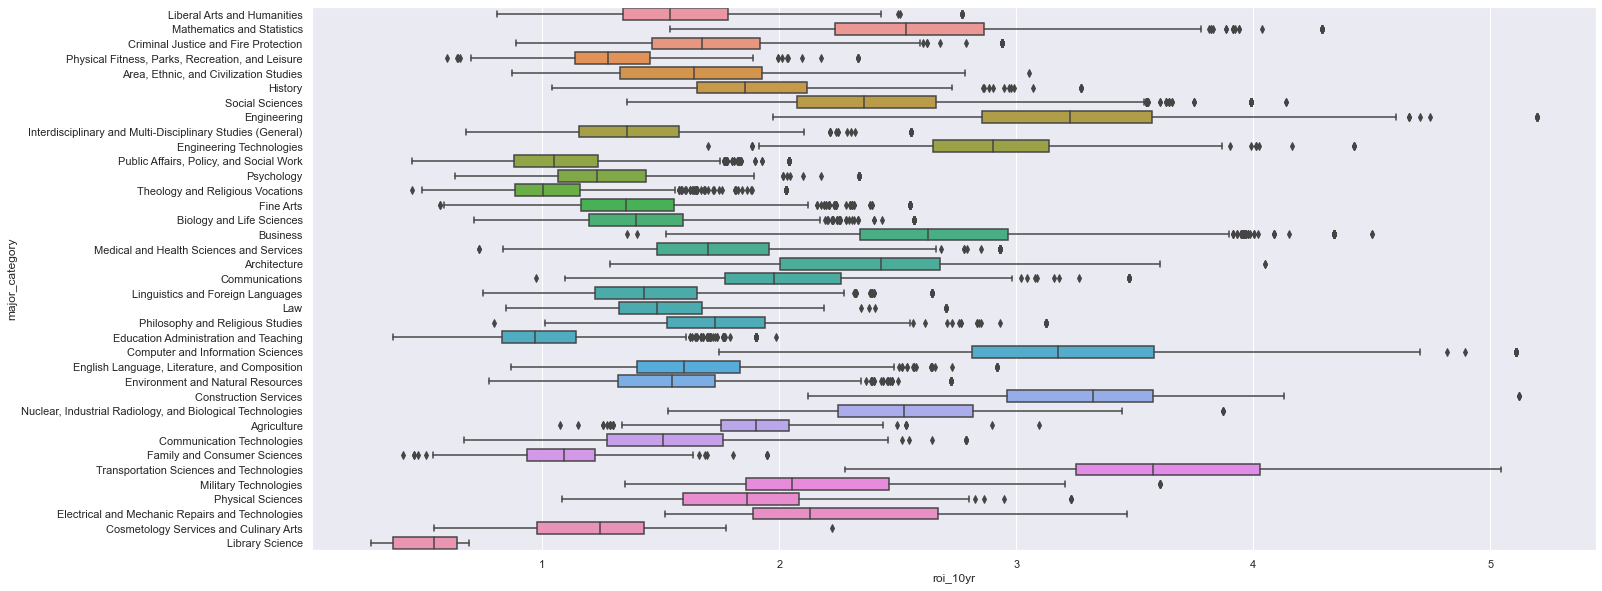

In [43]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='roi_10yr', data = train1)

In [50]:
# top ten 10-year ROI avg majors
train1.groupby('major_category').roi_10yr.mean().nlargest(10)

major_category
Transportation Sciences and Technologies                                     3.61
Construction Services                                                        3.33
Computer and Information Sciences                                            3.26
Engineering                                                                  3.22
Engineering Technologies                                                     2.91
Business                                                                     2.71
Mathematics and Statistics                                                   2.56
Nuclear, Industrial Radiology, and Biological Technologies                   2.55
Social Sciences                                                              2.40
Architecture                                                                 2.36
Name: roi_10yr, dtype: float64

<AxesSubplot:xlabel='roi_20yr', ylabel='major_category'>

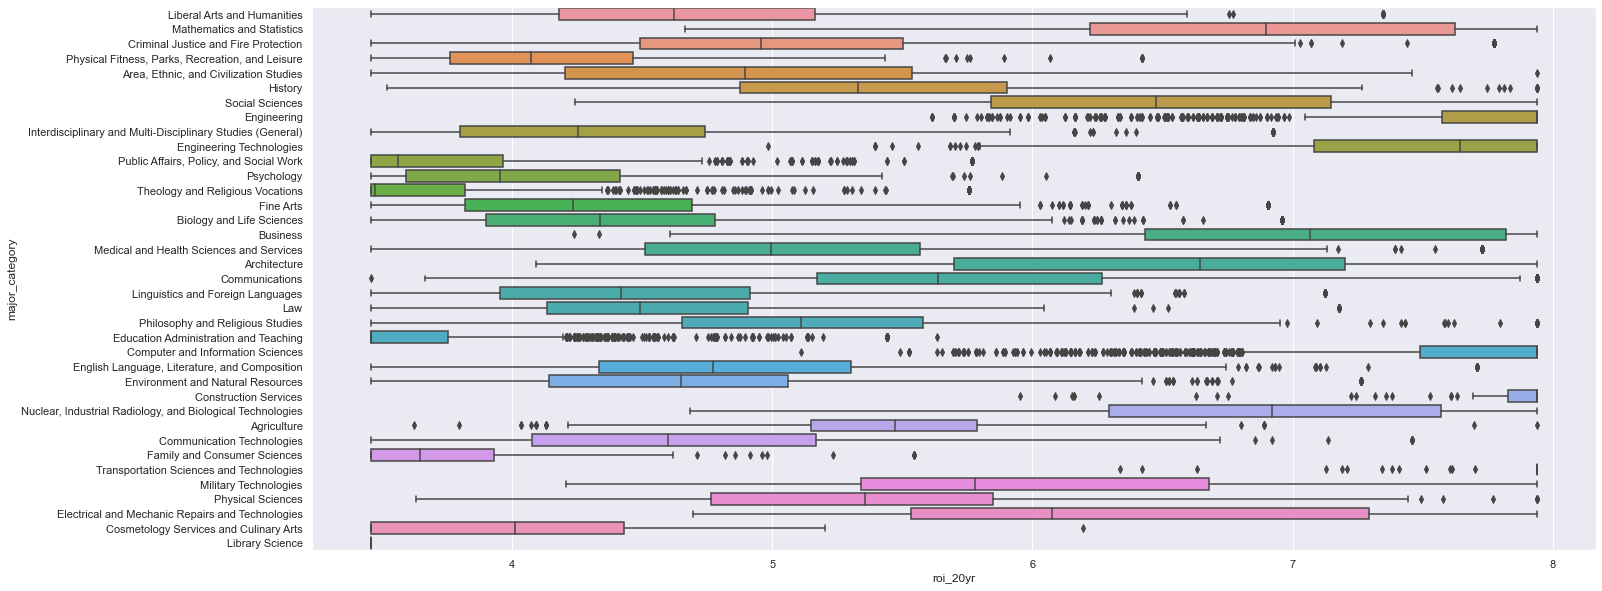

In [45]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='roi_20yr', data = train1)

In [52]:
# top ten 20-year ROI avg majors
train1.groupby('major_category').roi_20yr.mean().nlargest(10)

major_category
Transportation Sciences and Technologies                                     7.80
Construction Services                                                        7.70
Engineering                                                                  7.63
Computer and Information Sciences                                            7.62
Engineering Technologies                                                     7.40
Business                                                                     6.99
Mathematics and Statistics                                                   6.84
Nuclear, Industrial Radiology, and Biological Technologies                   6.80
Social Sciences                                                              6.48
Architecture                                                                 6.45
Name: roi_20yr, dtype: float64

### 4. Admission rate by major
* impute null with total avg

In [53]:
train1.admission_rate.mean()

0.6803626473070051

In [54]:
train1.groupby('major_category').admission_rate.mean()

major_category
Agriculture                                                                  0.70
Architecture                                                                 0.65
Area, Ethnic, and Civilization Studies                                       0.60
Biology and Life Sciences                                                    0.66
Business                                                                     0.70
Communication Technologies                                                   0.70
Communications                                                               0.70
Computer and Information Sciences                                            0.69
Construction Services                                                        0.71
Cosmetology Services and Culinary Arts                                       0.70
Criminal Justice and Fire Protection                                         0.70
Education Administration and Teaching                                        0.69
E

In [73]:
train1[train1.major_category == 'Business']['admission_rate'].isnull().sum()

725

In [57]:
train1[train1.major_category == 'Business']['admission_rate'].mean()

0.6997895379713246

In [78]:
# fill admission rate null with avg by major
train1.loc[(train1.major_category == 'Business') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Business']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Agriculture') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Agriculture']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Architecture') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Architecture']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Area, Ethnic, and Civilization Studies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Area, Ethnic, and Civilization Studies']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Biology and Life Sciences') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Biology and Life Sciences']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Communication Technologies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Communication Technologies']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Communications') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Communications']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Computer and Information Sciences') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Computer and Information Sciences']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Construction Services') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Construction Services']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Cosmetology Services and Culinary Arts') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Cosmetology Services and Culinary Arts']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Criminal Justice and Fire Protection') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Criminal Justice and Fire Protection']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Education Administration and Teaching') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Education Administration and Teaching']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Electrical and Mechanic Repairs and Technologies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Electrical and Mechanic Repairs and Technologies']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Engineering') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Engineering']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Engineering Technologies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Engineering Technologies']['admission_rate'].mean()
train1.loc[(train1.major_category == 'English Language, Literature, and Composition') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'English Language, Literature, and Composition']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Environment and Natural Resources') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Environment and Natural Resources']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Family and Consumer Sciences') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Family and Consumer Sciences']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Fine Arts') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Fine Arts']['admission_rate'].mean()
train1.loc[(train1.major_category == 'History') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'History']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Interdisciplinary and Multi-Disciplinary Studies (General)') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Interdisciplinary and Multi-Disciplinary Studies (General)']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Law') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Law']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Liberal Arts and Humanities') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Liberal Arts and Humanities']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Library Science') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Library Science']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Linguistics and Foreign Languages') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Linguistics and Foreign Languages']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Mathematics and Statistics') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Mathematics and Statistics']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Medical and Health Sciences and Services') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Medical and Health Sciences and Services']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Military Technologies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Military Technologies']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Nuclear, Industrial Radiology, and Biological Technologies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Nuclear, Industrial Radiology, and Biological Technologies']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Philosophy and Religious Studies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Philosophy and Religious Studies']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Physical Fitness, Parks, Recreation, and Leisure') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Physical Fitness, Parks, Recreation, and Leisure']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Physical Sciences') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Physical Sciences']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Psychology') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Psychology']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Public Affairs, Policy, and Social Work') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Public Affairs, Policy, and Social Work']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Social Sciences') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Social Sciences']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Theology and Religious Vocations') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Theology and Religious Vocations']['admission_rate'].mean()
train1.loc[(train1.major_category == 'Transportation Sciences and Technologies') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Transportation Sciences and Technologies']['admission_rate'].mean()

In [79]:
train1[train1.major_category == 'Public Affairs, Policy, and Social Work']['admission_rate'].isnull().sum()

0

In [70]:
# train1.loc[(train1.major_category == 'Business') & train1.admission_rate.isna(), 'admission_rate'] = train1[train1.major_category == 'Business']['admission_rate'].mean()

In [80]:
# check null
train1[train1.admission_rate.isnull()].reset_index().major_category.value_counts()

Series([], Name: major_category, dtype: int64)

<AxesSubplot:xlabel='admission_rate', ylabel='major_category'>

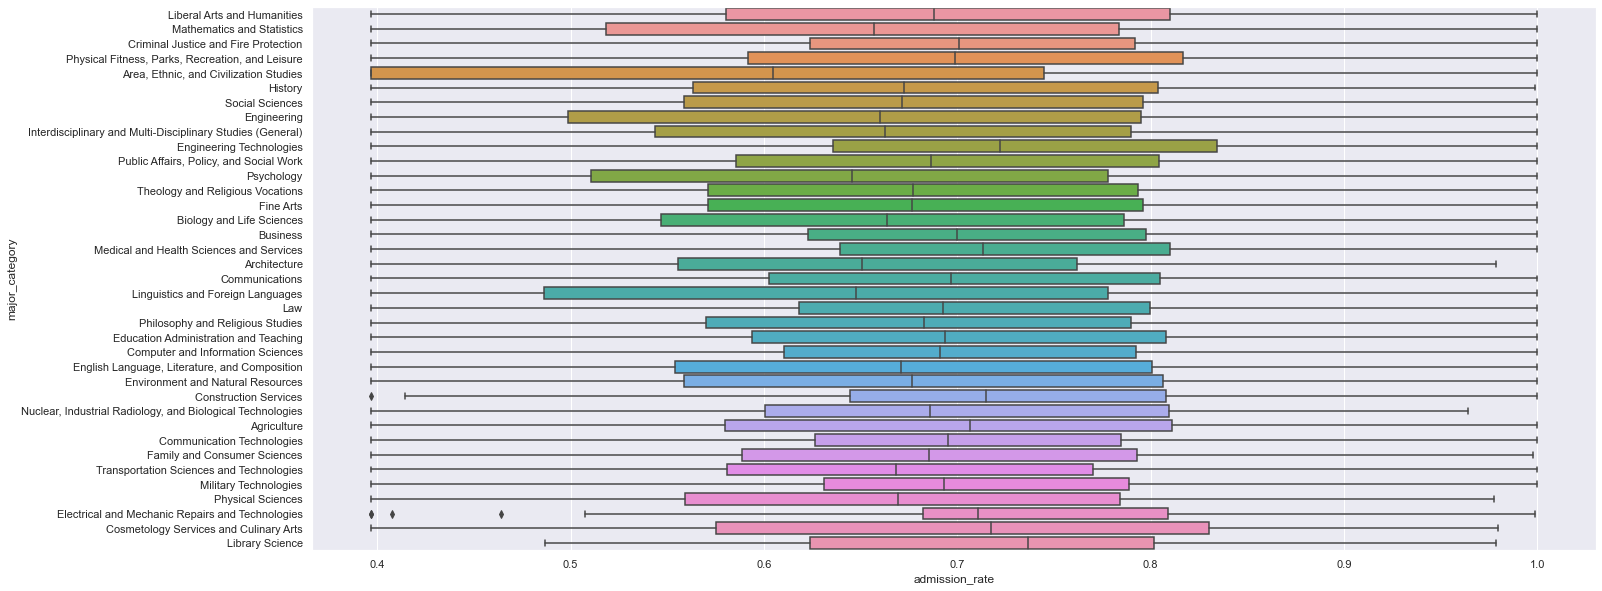

In [81]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='admission_rate', data = train1)

<AxesSubplot:xlabel='admission_rate', ylabel='major_category'>

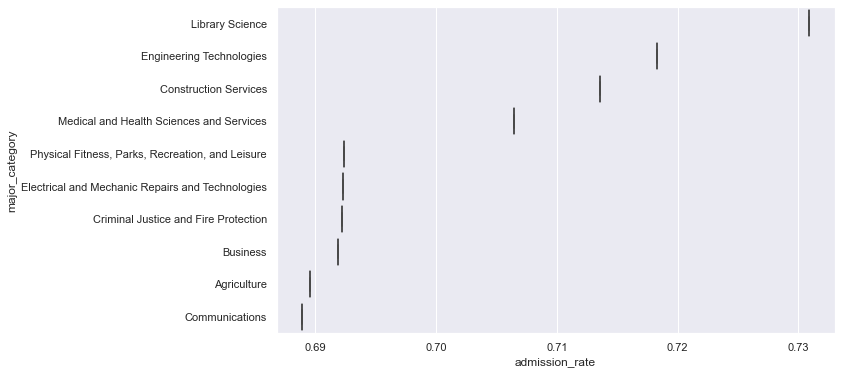

In [175]:
# top 10
plt.figure(figsize=(10, 6))
top10_admission_rate_major = train.groupby('major_category').admission_rate.mean().nlargest(10).reset_index()
sns.boxplot(y='major_category',x='admission_rate', data = top10_admission_rate_major)

### 5. avg sat score by major

<AxesSubplot:xlabel='avg_sat_admitted', ylabel='major_category'>

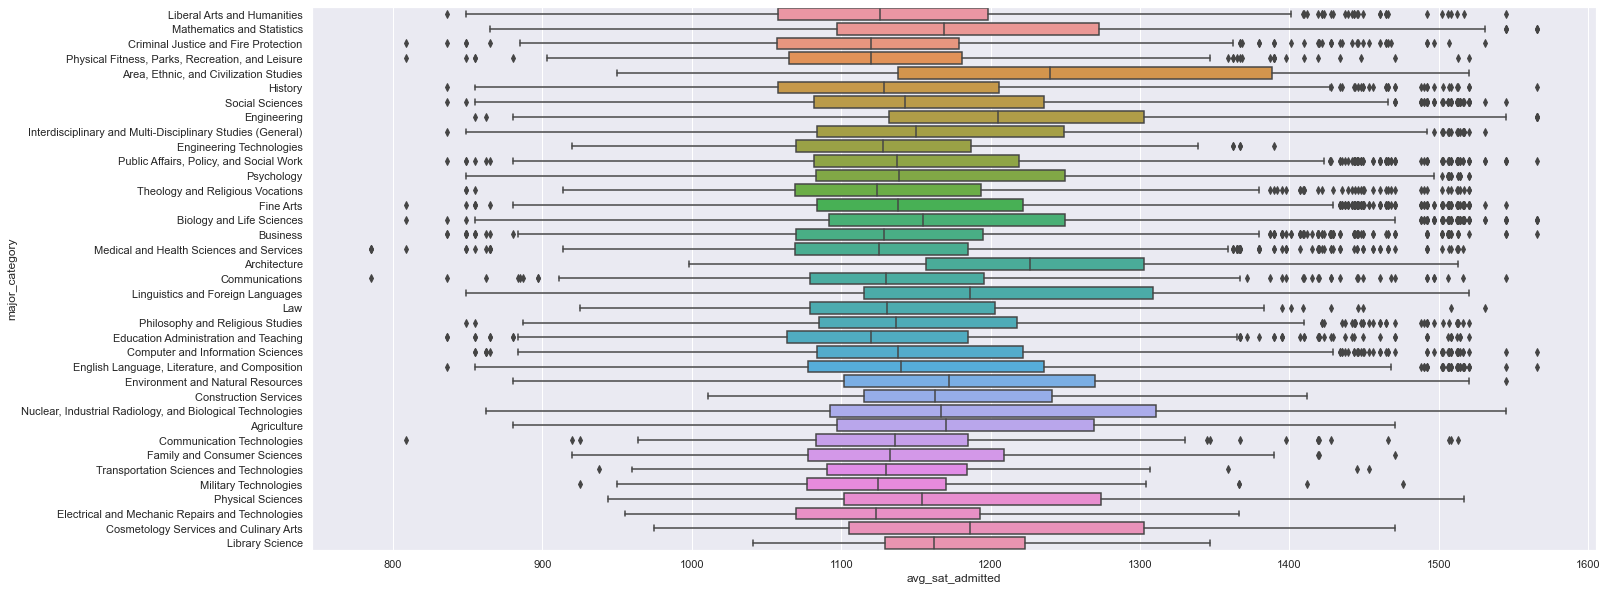

In [179]:
plt.figure(figsize=(23, 10))
sns.boxplot(y='major_category', x='avg_sat_admitted', data = train)

<AxesSubplot:xlabel='avg_sat_admitted', ylabel='major_category'>

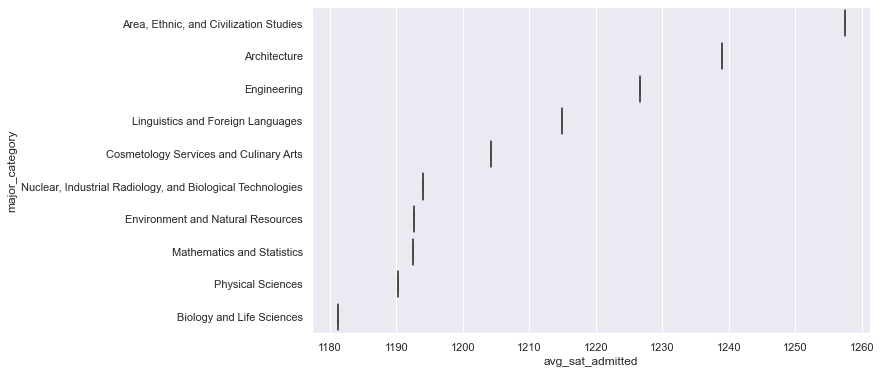

In [181]:
# top 10
plt.figure(figsize=(10, 6))
top10_sat_score_major = train.groupby('major_category').avg_sat_admitted.mean().nlargest(10).reset_index()
sns.boxplot(y='major_category',x='avg_sat_admitted', data = top10_sat_score_major)

### 6. full-time and part-time by major

'share_entering_students_first_ft', 'share_of_part_time'

In [182]:
train.groupby('major_category').share_entering_students_first_ft.mean().nlargest(10).reset_index()

,major_category,share_entering_students_first_ft
0,"Area, Ethnic, and Civilization Studies",0.78
1,Linguistics and Foreign Languages,0.77
2,Mathematics and Statistics,0.76
3,Engineering,0.75
4,Biology and Life Sciences,0.75
5,"English Language, Literature, and Composition",0.74
6,Library Science,0.74
7,Interdisciplinary and Multi-Disciplinary Studi...,0.74
8,Environment and Natural Resources,0.74
9,Philosophy and Religious Studies,0.73


In [183]:
train.groupby('major_category').share_of_part_time.mean().nlargest(10).reset_index()

,major_category,share_of_part_time
0,"Nuclear, Industrial Radiology, and Biological ...",0.22
1,Electrical and Mechanic Repairs and Technologies,0.22
2,Law,0.21
3,Transportation Sciences and Technologies,0.21
4,Construction Services,0.19
5,Criminal Justice and Fire Protection,0.19
6,Medical and Health Sciences and Services,0.19
7,Computer and Information Sciences,0.18
8,Engineering Technologies,0.18
9,Military Technologies,0.18


### 7. race by major
* impute null value as 0

        enrollment_share_asian
        enrollment_share_two_races
        enrollment_share_unknown
        enrollment_share_non_resident
        enrollment_share_pac_islander
        enrollment_share_hispanic
        enrollment_share_black
        enrollment_share_native_american
        enrollment_share_white

In [200]:
df['enrollment_share_asian'] = df['enrollment_share_asian'].fillna(0)
df['enrollment_share_two_races'] = df['enrollment_share_two_races'].fillna(0)
df['enrollment_share_unknown'] = df['enrollment_share_unknown'].fillna(0)
df['enrollment_share_non_resident'] = df['enrollment_share_non_resident'].fillna(0)
df['enrollment_share_pac_islander'] = df['enrollment_share_pac_islander'].fillna(0)
df['enrollment_share_hispanic'] = df['enrollment_share_hispanic'].fillna(0)
df['enrollment_share_black'] = df['enrollment_share_black'].fillna(0)
df['enrollment_share_native_american'] = df['enrollment_share_native_american'].fillna(0)
df['enrollment_share_white'] = df['enrollment_share_white'].fillna(0)

##  How is the 5 years and 10 years ROI in different states?

In [38]:
# plt.figure(figsize=(15, 7))
# sns.scatterplot(x='longitude', y='latitude', data=train, hue = 'roi_5yr')

<AxesSubplot:xlabel='state_post_code', ylabel='roi_5yr'>

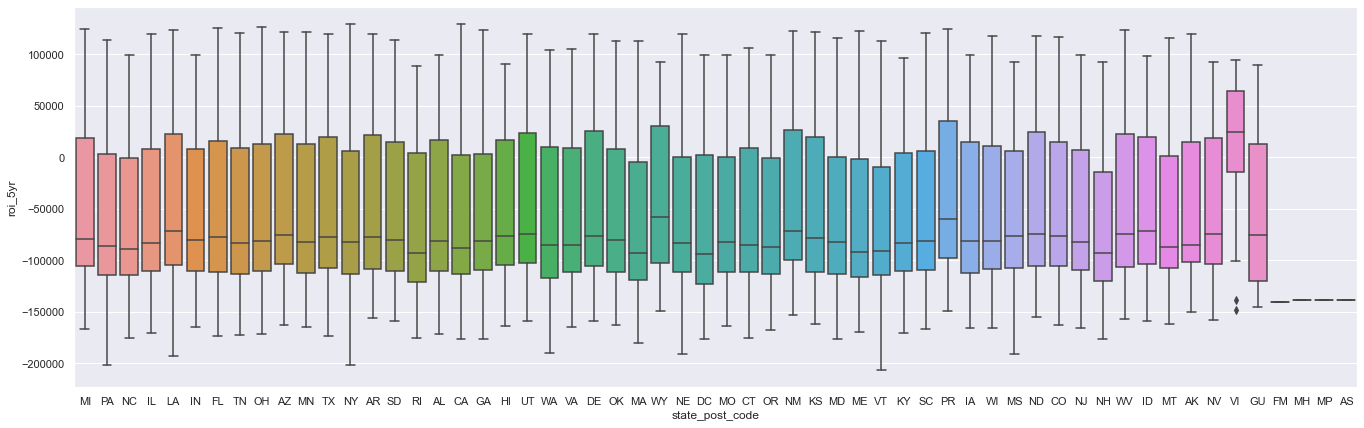

In [36]:
plt.figure(figsize=(23, 7))
sns.boxplot(x='state_post_code', y='roi_5yr', data = train)

<AxesSubplot:xlabel='state_post_code', ylabel='roi_10yr'>

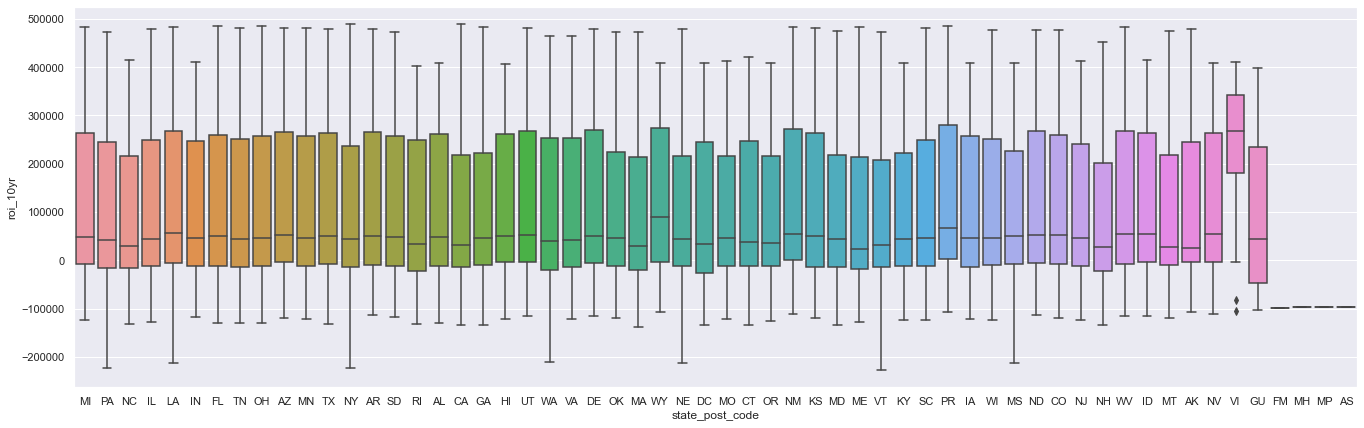

In [37]:
plt.figure(figsize=(23, 7))
sns.boxplot(x='state_post_code', y='roi_10yr', data = train)